### Activity - Build a cats and dog classifier

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os

In [4]:
import cv2

In [5]:
Categories = ['cats', 'dogs']

In [6]:
training = []
testing = []

In [7]:

path_train = r"E:\Avantika Univeristy\Avantika University 4th year\Semester 7\Artificial intelligence advance\activity cats and dogs\dataset\data\train"
path_test = r"E:\Avantika Univeristy\Avantika University 4th year\Semester 7\Artificial intelligence advance\activity cats and dogs\dataset\data\test"


In [8]:
def createTrainingData():
    for category in Categories:
        path = os.path.join(path_train, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (300, 300))
            training.append([new_array, class_num])

In [9]:
def createTestingData():
    for category in Categories:
        path = os.path.join(path_test, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (300, 300))
            testing.append([new_array, class_num])

In [10]:
createTrainingData()
createTestingData()

In [11]:
from numpy import random
random.shuffle(training)
random.shuffle(testing)

In [12]:
IMG_SIZE = 300
X_train =[]
y_train =[]
for features, label in training:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_train.shape

(80, 300, 300, 3)

In [13]:
IMG_SIZE = 300
X_test =[]
y_test =[]
for features, label in testing:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_test.shape

(20, 300, 300, 3)

In [14]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(Categories[y[index]])

In [15]:
y_train[:5]

[0, 1, 1, 1, 1]

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np.array(y_train)
y_test = np.array(y_test)
print(y_train.shape, y_test.shape)

(80,) (20,)


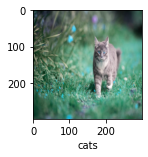

In [17]:
plot_sample(X_train, y_train, 25)

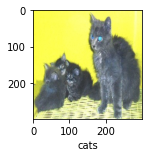

In [18]:
plot_sample(X_test, y_test, 15)

In [19]:
X_test.shape

(20, 300, 300, 3)

In [20]:
X_train.shape

(80, 300, 300, 3)

In [21]:
X_train[0] = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2RGB)

In [22]:
for i in range(len(X_train)):
    X_train[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)

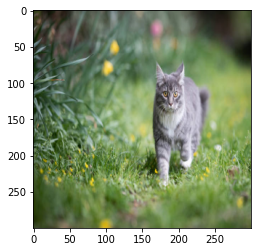

In [23]:
plt.imshow(X_train[25])

In [24]:
for i in range(len(X_test)):
    X_test[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)

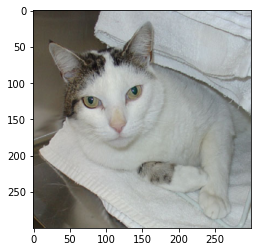

In [25]:
plt.imshow(X_test[0])

In [26]:
X_train = X_train.reshape(-1, 300, 300, 3)
X_test = X_test.reshape(-1, 300, 300, 3 )

In [27]:
cnn = keras.models.Sequential([
                               keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(300,300,3)), # Layer 1 of the convolution. It has 32 filters with a kernal of 3x3.
                               keras.layers.MaxPooling2D(pool_size = 2, strides = 2), # pooling is used to decrease the size. here it is reducing the size to half
                               keras.layers.Dropout(.4),
                               keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu'), # Layer 2 of convolution. It has 64 filter with a kernal of 3x3
                               keras.layers.MaxPooling2D(pool_size = 2, strides = 2), # pooling layer of 2x2 to decrease the size by half                   
                               keras.layers.Flatten(), # Layer of vectorising the data
                               keras.layers.Dense(64,activation='relu'), # first FC layer
                               keras.layers.Dense(32,activation='relu'),
                               keras.layers.Dense(2,activation='softmax',) # The output layer. The output has a softmax activation function
])

In [28]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # Compilation of the cnn model

In [29]:
cnn.fit(X_train,y_train,epochs=50) # Fitting the data in the cnn model

Epoch 1/50
3/3 [==============================] - 59s 3s/step - loss: 12.5398 - accuracy: 0.5250
Epoch 2/50
3/3 [==============================] - 3s 813ms/step - loss: 2.7316 - accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 3s 809ms/step - loss: 0.8241 - accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 3s 803ms/step - loss: 0.6922 - accuracy: 0.5125
Epoch 5/50
3/3 [==============================] - 3s 807ms/step - loss: 0.6758 - accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 3s 804ms/step - loss: 0.6835 - accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 3s 798ms/step - loss: 0.6755 - accuracy: 0.5125
Epoch 8/50
3/3 [==============================] - 3s 802ms/step - loss: 0.6776 - accuracy: 0.5125
Epoch 9/50
3/3 [==============================] - 3s 809ms/step - loss: 0.6672 - accuracy: 0.5125
Epoch 10/50
3/3 [==============================] - 3s 803ms/step - loss: 0.6562 - accuracy: 0.5125
Epoch 11/50
3/3 [===

In [30]:
#cnn.fit(X_train,y_train,epochs=200) # Fitting the data in the cnn model

In [31]:
#cnn.fit(X_train,y_train,epochs=300) # Fitting the data in the cnn model

In [ ]:
y_pred=cnn.predict(X_test) # Testing the output by predicting test values on the model

In [ ]:
y_classes = [np.argmax(element) for element in y_pred] # Getting the pretedted classes my fetching only the highest probablity value

In [ ]:
y_classes[:5], y_test[:5] # Comparison of the first 5 elements of the prediction and the actual valus

In [ ]:
# Importing confusion matrix and classification report for more accurate measure of the model's performance
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print("Classification Report\n",classification_report(y_test,y_classes)) # Classification report of the CNN

In [ ]:
cnn_aug = keras.models.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
    keras.layers.experimental.preprocessing.RandomFlip(seed = 0.5),
    keras.layers.experimental.preprocessing.RandomContrast(0.2)
])

In [ ]:
cnn_model = keras.models.Sequential([
                               cnn_aug,
                               keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(300,300,3)), # Layer 1 of the convolution. It has 32 filters with a kernal of 3x3.
                               keras.layers.MaxPooling2D(pool_size = 2, strides = 2), # pooling is used to decrease the size. here it is reducing the size to half
                               keras.layers.Dropout(.4),
                               keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu'), # Layer 2 of convolution. It has 64 filter with a kernal of 3x3
                               keras.layers.MaxPooling2D(pool_size = 2, strides = 2), # pooling layer of 2x2 to decrease the size by half                   
                               keras.layers.Conv2D(filters=128,kernel_size=(5,5),activation='relu'), # Layer 3 of convolution. It has 64 filter with a kernal of 3x3
                               keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
                               keras.layers.Flatten(), # Layer of vectorising the data
                               keras.layers.Dense(64,activation='relu'), # first FC layer
                               keras.layers.Dense(32,activation='relu'),
                               keras.layers.Dense(2,activation='softmax',) # The output layer. The output has a softmax activation function
])

In [ ]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # Compilation of the cnn model

In [ ]:
cnn_model.fit(X_train, y_train, epochs=100)

In [ ]:
y_pred=cnn.predict(X_test) # Testing the output by predicting test values on the model

In [ ]:
y_classes = [np.argmax(element) for element in y_pred] # Getting the pretedted classes my fetching only the highest probablity value

In [ ]:
y_classes[:5], y_test[:5] # Comparison of the first 5 elements of the prediction and the actual valus

In [ ]:
print("Classification Report\n",classification_report(y_test,y_classes)) # Classification report of the CNN

### Assignment -2 B Transfer learning